
# Análise da Transição Energética e Sustentabilidade Global

# Desenvolvida por:
Murilo Ribeiro - RM555109

Thiago Garcia - RM99404

Ian Madeira - RM555502

# Introdução
Com o crescente impacto das mudanças climáticas e a necessidade de reduzir as emissões de gases de efeito estufa, a transição energética tornou-se essencial. Este projeto aborda o consumo de energias renováveis e fósseis, o crescimento dos veículos elétricos e a eficiência energética por setor. A análise foca em países como Brasil, Estados Unidos, China, Alemanha e Índia, representando economias com grande influência no cenário global.

# Metodologia
Os dados foram analisados a partir de fontes confiáveis, utilizando técnicas como:

**Visualização de Dados:** Gráficos para identificar padrões e tendências.

**Modelagem Preditiva:** Aplicação de regressão linear para prever emissões com base em variáveis energéticas.

**Clusterização (KMeans):** Identificação de agrupamentos entre setores econômicos para avaliar a eficiência energética.

**PCA:** Redução de dimensionalidade para melhorar a performance dos modelos.

# Importação das Bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import joblib

# Ler os arquivos CSV carregados para criar os dataframes

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1kOQllkgzLUXpYqJOStMDzMjpa-xLRVLb')
df_ev = pd.read_csv('https://drive.google.com/uc?export=download&id=1Kp4FB3k01QpxY-SsLjcoC9KAbEh6EjC0')
df_sectors = pd.read_csv('https://drive.google.com/uc?export=download&id=1kwMeFoA4uR4L-SGjxmoU5qy8nprFnYKT')
df_pib = pd.read_csv('https://drive.google.com/uc?export=download&id=1A0IReQHVloTTwTjbOco13l2nK7X3J5sW')

# Configurações para visualização
## Definindo o estilo para os gráficos com Seaborn

In [3]:
sns.set_theme(style="whitegrid")

# Análise inicial dos datasets
## Exibindo informações sobre os datasets para entender suas estruturas e características

In [4]:
print("Descrição do dataset de Transição Energética:")
print(df.describe())
print(df.info())

print("Descrição do dataset de Veículos Elétricos:")
print(df_ev.describe())
print(df_ev.info())

print("Descrição do dataset de Setores Econômicos:")
print(df_sectors.describe())
print(df_sectors.info())

print("Descrição do dataset PIB e Energia Limpa:")
print(df_pib.describe())
print(df_pib.info())

Descrição do dataset de Transição Energética:
               year    population           gdp  biofuel_cons_change_pct  \
count  22012.000000  1.812300e+04  1.111300e+04              1747.000000   
mean    1974.213247  1.053096e+08  3.585114e+11                46.091694   
std       35.058653  4.640460e+08  2.411179e+12               274.616745   
min     1900.000000  1.833000e+03  1.642060e+08              -100.000000   
25%     1946.000000  1.712404e+06  1.365898e+10                -0.616500   
50%     1984.000000  6.991543e+06  4.167411e+10                 8.179000   
75%     2003.000000  2.557688e+07  1.744295e+11                26.508500   
max     2022.000000  7.975105e+09  1.136302e+14              5659.328000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count              2687.000000              2302.000000          2767.000000   
mean                  2.719074               133.558459            38.068209   
std                  10.05701

# Filtrar apenas os países de interesse (Brasil e principais economias globais)
## Selecionamos apenas os dados dos países que queremos analisar: Brasil e grandes economias globais

In [5]:
countries_of_interest = ['Brazil', 'United States', 'China', 'Germany', 'India']
df_filtered = df[df['country'].isin(countries_of_interest)]
df_ev_filtered = df_ev[(df_ev['parameter'] == 'EV sales') & (df_ev['country'].isin(countries_of_interest))]
df_pib_filtered = df_pib[df_pib['country'].isin(countries_of_interest)]

# Obter o ano mais recente disponível nos dados

# Identificamos o ano mais recente presente no dataset para focar na análise atual

In [6]:
latest_year = df_filtered['year'].max()
df_latest_year = df_filtered[df_filtered['year'] == latest_year]

# Criar variáveis de consumo total de renováveis e fósseis

# Calculamos o consumo total de energias renováveis e fósseis para o ano mais recente

In [7]:
df_latest_year['renewables_consumption'] = (
    df_latest_year['biofuel_consumption'] +
    df_latest_year['solar_consumption'] +
    df_latest_year['wind_consumption']
)
df_latest_year['fossil_fuel_consumption'] = (
    df_latest_year['coal_consumption'] +
    df_latest_year['oil_consumption']
)

C:\Users\Murilo\AppData\Local\Temp\ipykernel_3024\4224911484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_year['renewables_consumption'] = (
C:\Users\Murilo\AppData\Local\Temp\ipykernel_3024\4224911484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_year['fossil_fuel_consumption'] = (


# Gráficos
# Vamos gerar alguns gráficos para visualizar as informações de forma mais clara.

# Gráfico 1: Consumo de Energias Renováveis e Fósseis por País
## Este gráfico compara o consumo de energias renováveis e fósseis nos países selecionados

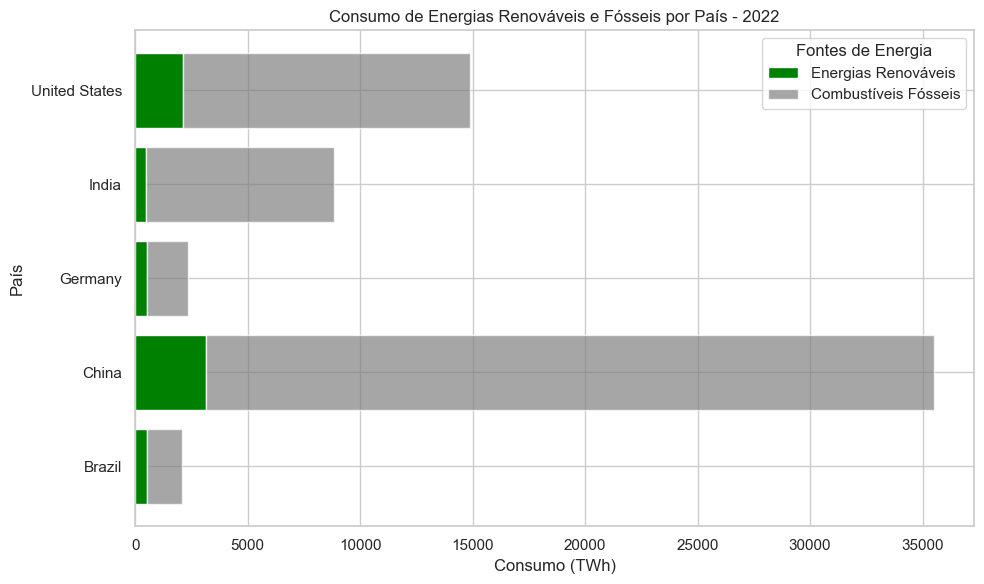

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(df_latest_year['country'], df_latest_year['renewables_consumption'],
        color='green', label='Energias Renováveis')

ax.barh(df_latest_year['country'], df_latest_year['fossil_fuel_consumption'],
        color='gray', label='Combustíveis Fósseis', alpha=0.7,
        left=df_latest_year['renewables_consumption'])

plt.title(f'Consumo de Energias Renováveis e Fósseis por País - {latest_year}')
plt.xlabel('Consumo (TWh)')
plt.ylabel('País')
plt.legend(title='Fontes de Energia')
plt.tight_layout()
plt.show()

# Gráfico 2: Crescimento no Uso de Veículos Elétricos ao Longo dos Anos
## Este gráfico mostra a evolução das vendas de veículos elétricos nos países de interesse ao longo dos anos

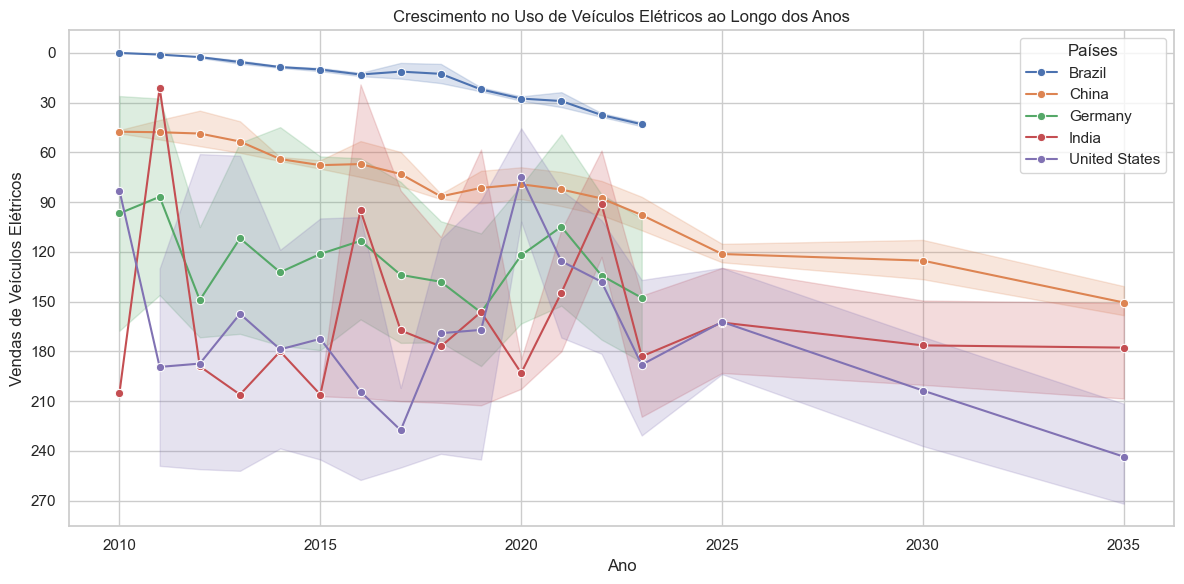

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ev_filtered, x='year', y='value', hue='country', marker='o')

plt.title('Crescimento no Uso de Veículos Elétricos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Vendas de Veículos Elétricos')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend(title='Países')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 3: Eficiência Energética por Setor
## Este gráfico mostra a quantidade de energia renovável consumida por setor econômico

C:\Users\Murilo\AppData\Local\Temp\ipykernel_3024\2358560551.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sectors_grouped, x='sector', y='total_renewable_energy', palette='viridis')


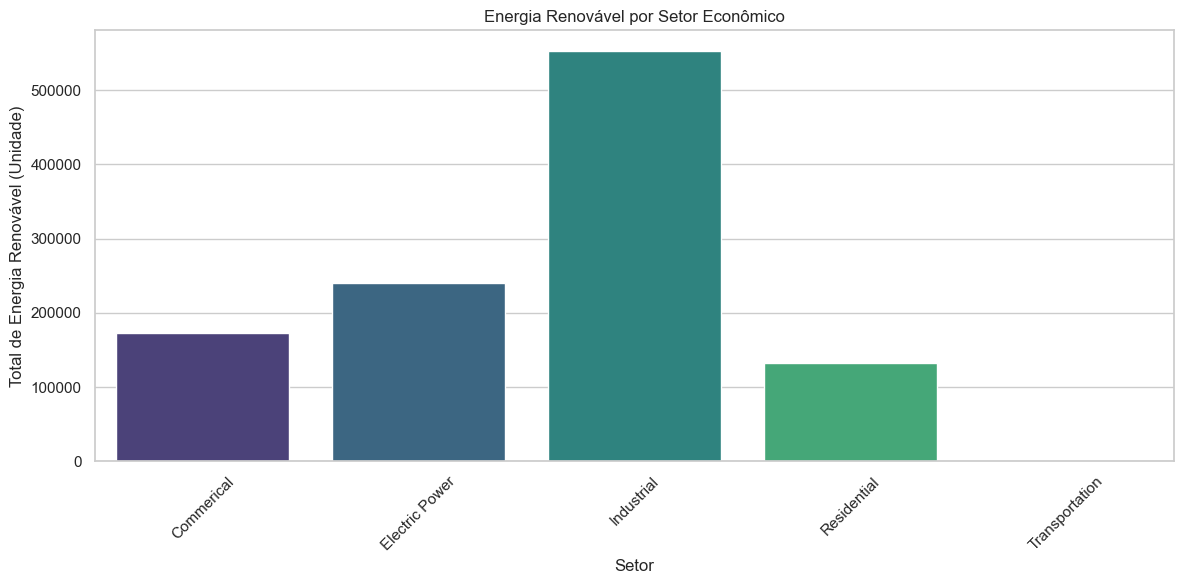

In [10]:
df_sectors['total_renewable_energy'] = (
    df_sectors['hydroelectric_power'] +
    df_sectors['geothermal_energy'] +
    df_sectors['solar_energy'] +
    df_sectors['wind_energy'] +
    df_sectors['wood_energy'] +
    df_sectors['waste_energy'] +
    df_sectors['biomass_energy']
)

df_sectors_grouped = df_sectors.groupby('sector')['total_renewable_energy'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sectors_grouped, x='sector', y='total_renewable_energy', palette='viridis')
plt.title('Energia Renovável por Setor Econômico')
plt.xlabel('Setor')
plt.ylabel('Total de Energia Renovável (Unidade)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
print(df_filtered.columns)

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)


# Gráfico 4: Impacto Econômico de Inovações em Energia Limpa
## Visualizando o impacto das inovações em energia limpa no crescimento do PIB, fluxos financeiros e uso de energias renováveis

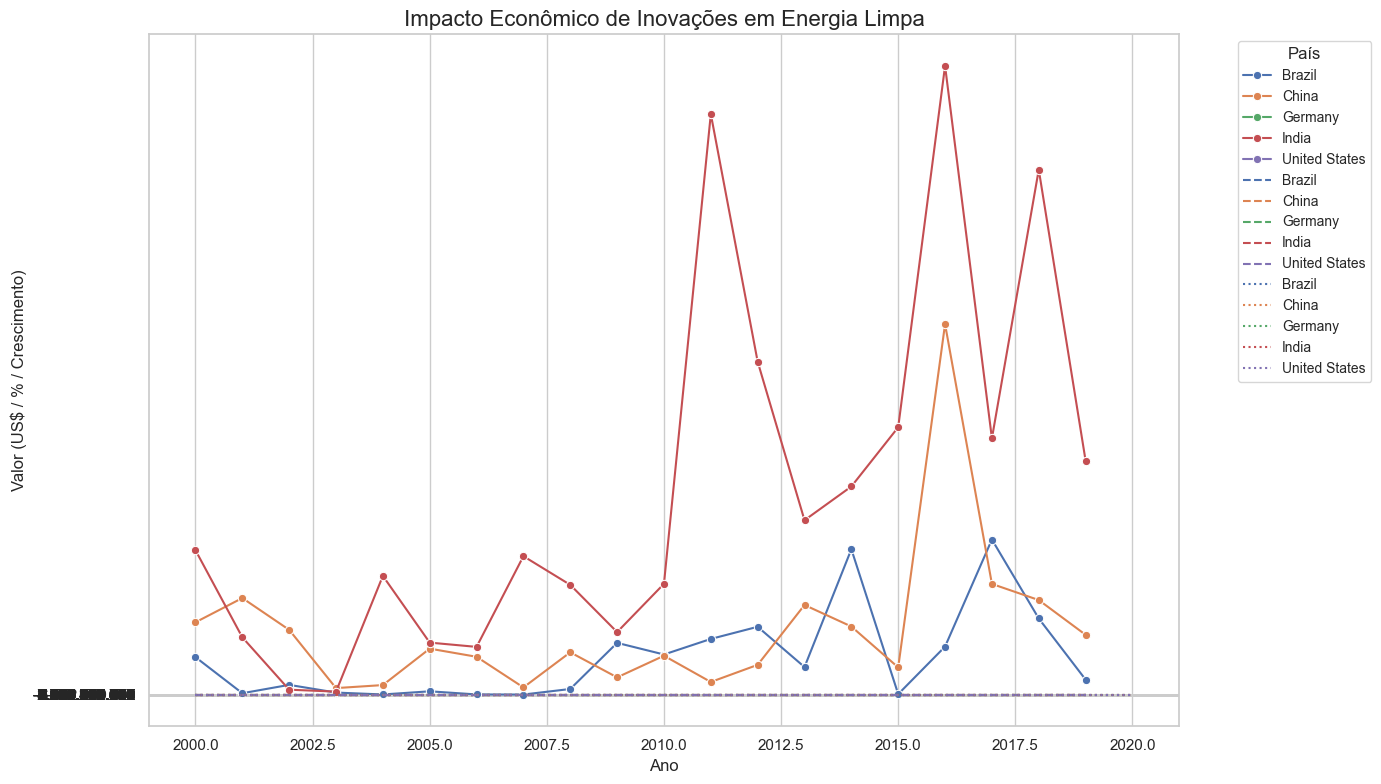

In [11]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=df_pib_filtered, x='year', y='financial flows to developing countries (US $)', hue='country', marker='o')

sns.lineplot(data=df_pib_filtered, x='year', y='renewable energy share in the total final energy consumption (%)', hue='country', linestyle='--', marker=None)

sns.lineplot(data=df_pib_filtered, x='year', y='gdp_growth', hue='country', linestyle=':', marker=None)

plt.title('Impacto Econômico de Inovações em Energia Limpa', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor (US$ / % / Crescimento)', fontsize=12)
plt.gca().invert_yaxis()
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Gráfico 5: Dispersão para Consumo de Energia e Emissões de Gases de Efeito Estufa
## Visualiza a relação entre o consumo de combustíveis fósseis e as emissões de gases de efeito estufa

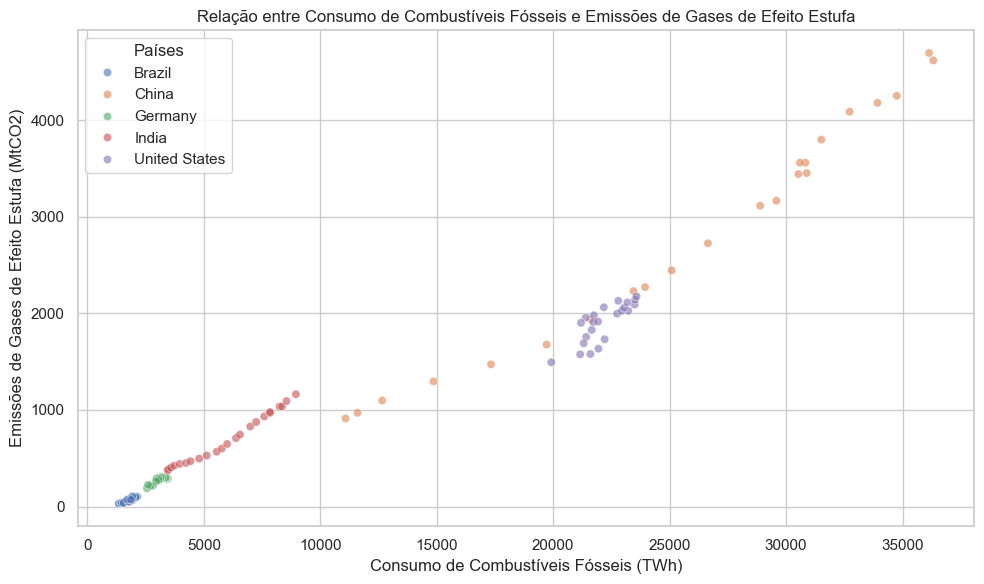

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='fossil_fuel_consumption', y='greenhouse_gas_emissions', hue='country', alpha=0.6)
plt.title('Relação entre Consumo de Combustíveis Fósseis e Emissões de Gases de Efeito Estufa')
plt.xlabel('Consumo de Combustíveis Fósseis (TWh)')
plt.ylabel('Emissões de Gases de Efeito Estufa (MtCO2)')
plt.legend(title='Países')
plt.tight_layout()
plt.show()

# Modelagem Preditiva
## Agora, vamos tratar os valores ausentes e realizar a modelagem preditiva para prever o progresso das políticas de eficiência energética

# Seleção das variáveis preditoras e variável alvo
## Usaremos o consumo de renováveis, fósseis e as emissões de gases de efeito estufa para prever o impacto dessas variáveis no progresso das políticas

In [13]:
X = df[['renewables_consumption', 'fossil_fuel_consumption', 'greenhouse_gas_emissions']]
y = df['greenhouse_gas_emissions']

# Limpeza dos dados: remoção de valores ausentes na variável alvo (y)

In [14]:
df_clean = df.dropna(subset=['greenhouse_gas_emissions'])
X_clean = df_clean[['renewables_consumption', 'fossil_fuel_consumption', 'greenhouse_gas_emissions']]
y_clean = df_clean['greenhouse_gas_emissions']

# Imputação dos dados ausentes nas variáveis preditoras (X)

In [15]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_clean)

# Redução de dimensionalidade com PCA

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dividir os dados em treino e teste

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.3, random_state=42)

# Criação e treinamento do modelo de regressão linear

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Avaliação do modelo: previsão e cálculo do erro quadrático médio

In [19]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 280.45


# Clusterização de Setores Econômicos
## Vamos agrupar os setores econômicos com base nas fontes de energia renovável que eles consomem

In [20]:
X_sectors = df_sectors[['hydroelectric_power', 'geothermal_energy', 'solar_energy', 'wind_energy', 'wood_energy', 'waste_energy', 'biomass_energy']]

# Substituir valores ausentes (se houver) por média

In [21]:
imputer_sectors = SimpleImputer(strategy='mean')
X_sectors_imputed = imputer_sectors.fit_transform(X_sectors)

# Normalizar os dados

In [22]:
scaler_sectors = StandardScaler()
X_sectors_scaled = scaler_sectors.fit_transform(X_sectors_imputed)

# Método do Cotovelo para determinar o número ideal de clusters

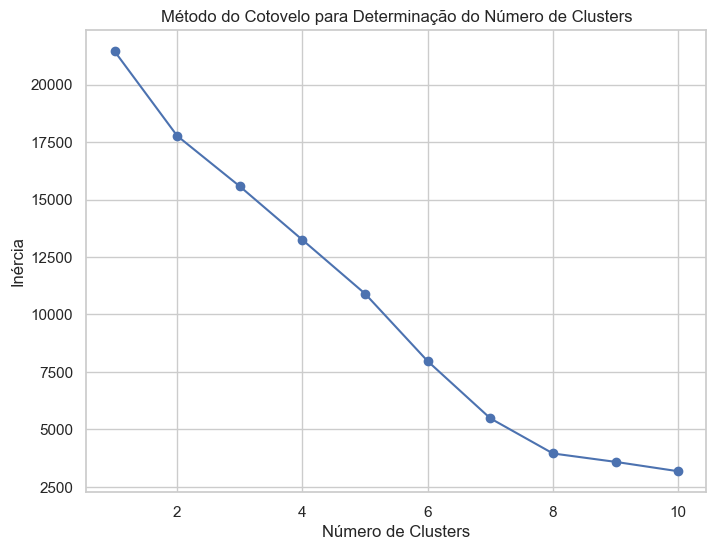

In [23]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sectors_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinação do Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Baseado no gráfico, escolher o número de clusters (n_clusters)
# Vamos assumir que 3 clusters é uma escolha razoável com base no gráfico

# Aplicar KMeans com o número de clusters escolhido

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_sectors['Cluster'] = kmeans.fit_predict(X_sectors_scaled)

# Visualizar os clusters resultantes

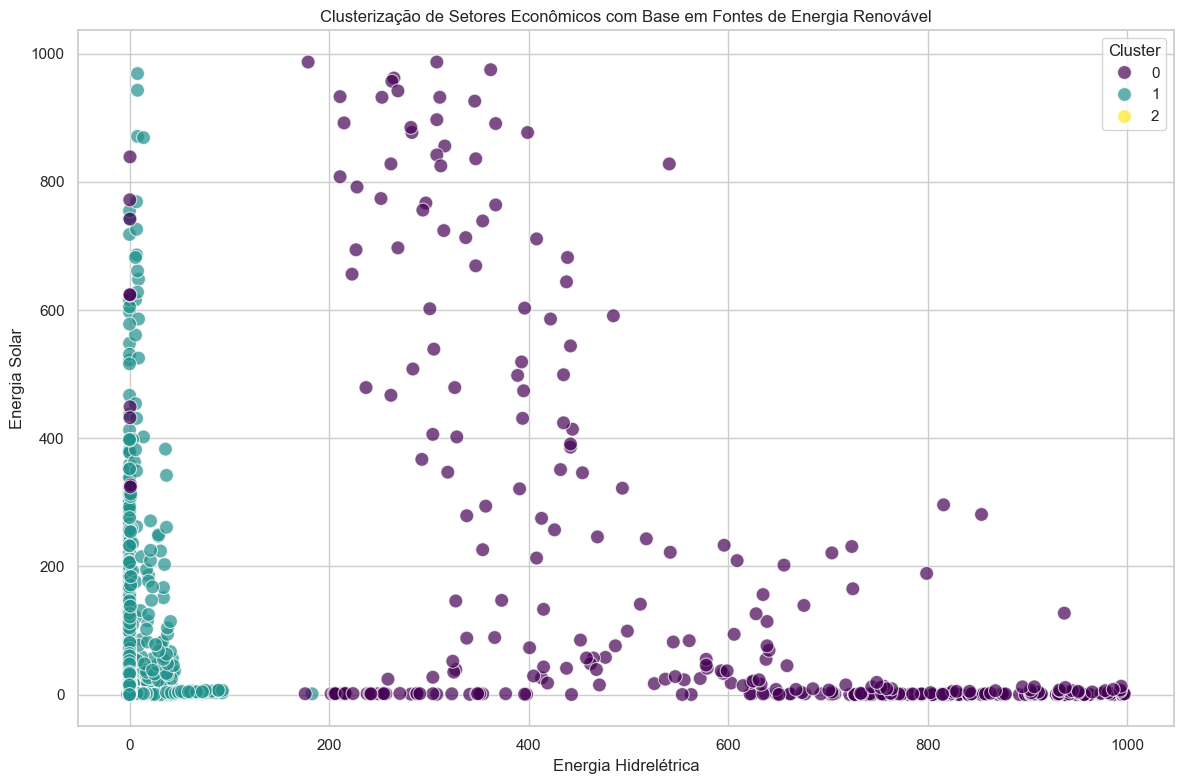

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_sectors, x='hydroelectric_power', y='solar_energy', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusterização de Setores Econômicos com Base em Fontes de Energia Renovável')
plt.xlabel('Energia Hidrelétrica')
plt.ylabel('Energia Solar')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Analisando a pontuação de silhueta para avaliar a qualidade da clusterização

In [26]:
sil_score = silhouette_score(X_sectors_scaled, df_sectors['Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.54


# Salvando os modelos

In [27]:
joblib.dump(regressor, 'app/modelo_regressao_linear.pkl')
joblib.dump(kmeans, 'app/modelo_kmeans.pkl')

print("Modelos salvos com sucesso no diretório 'app'")

Modelos salvos com sucesso no diretório 'app'


# Conclusão
A análise revelou padrões importantes, como o crescimento do uso de energias renováveis em economias emergentes e o avanço dos veículos elétricos em mercados chave. Também foi possível agrupar setores econômicos com base no uso de energias renováveis, fornecendo insights para melhorias em políticas públicas e investimentos.

# Importância dos Modelos e Análises
Os modelos aplicados, como regressão linear e KMeans, são ferramentas cruciais para compreender a relação entre consumo energético e emissões. Eles permitem prever impactos futuros e identificar setores estratégicos para priorizar a transição energética. Essas análises fornecem informações que podem embasar decisões governamentais e empresariais, acelerando a adoção de práticas mais sustentáveis e contribuindo para um futuro com menor impacto ambiental.

# Fonte:
df: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption?select=World+Energy+Consumption.csv

df_ev: https://www.kaggle.com/datasets/patricklford/global-ev-sales-2010-2024?select=IEA+Global+EV+Data+2024.csv

df_pib: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy?select=global-data-on-sustainable-energy+%281%29.csv

df_sectors: https://www.kaggle.com/datasets/alistairking/renewable-energy-consumption-in-the-u-s?select=dataset.csv

Obs.: Algumas bases de dados foram modificadas, tendo colunas excluídas ou renomeadas, mas o conteúdo permanece original.